In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Data file.csv',index_col=0)

In [3]:
pd.options.display.max_columns=None

In [4]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


#### Checking data types of each column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

- There are object data types in two columns msisdn, pcircle and pdate

- Droping msisdn, pcircle and pdate column

In [6]:
data.shape

(209593, 36)

In [7]:
data.drop(columns=['msisdn','pcircle','pdate'],inplace=True)
data.shape

(209593, 33)

#### Checking null values

In [8]:
data.isnull().values.any()

False

- There is no null value present in any column

#### Checking duplicated values

In [9]:
data.duplicated().sum()

386

- Found there are 386 duplicated rows in this data set

#### Removing duplicated rows from dataset

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

#### Statistical Describtion data

In [12]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000,209207.000000
mean,0.876715,8126.913916,5391.244370,6093.650746,2697.526834,3489.810579,3762.777569,3719.052167,2068.258161,3.985373,3744.250770,7718.675020,1816.155358,3859.034531,6.327059,7.731013,12419.048727,1868.028761,92.194875,263.062583,3756.412498,0.041571,0.045797,2.762212,17.973987,275.154439,0.054128,18.553232,23.677869,6.704431,0.046162,3.404893,4.329254
std,0.328764,75765.121261,9226.270853,10925.795977,4311.013689,5773.849370,53955.357784,53423.812523,2371.314219,4.256588,53692.850091,10143.578266,2071.312039,54055.920627,7.194994,12.597496,16864.939318,2082.061320,369.534991,4187.740777,53934.862376,0.397918,0.952261,2.555741,17.388191,4249.163551,0.218227,225.003451,26.483434,2.105587,0.200867,8.820229,10.315602
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.891000,43.113167,284.130000,304.640000,1.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,11.000000,2.000000,0.000000,2319.000000,773.000000,14.820000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,528.000000,1489.171333,1506.000000,1088.250000,1340.520000,3.000000,0.000000,1539.000000,3.000000,2.000000,4629.000000,1539.000000,34.000000,4.000000,2.000000,7287.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,983.000000,7258.112667,7816.320000,3364.395000,4209.845000,7.000000,0.000000,2309.000000,5.000000,6.000000,10012.000000,1924.000000,83.200000,9.000000,8.000000,16000.000000,1924.000000,79.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


#### EDA

#### Correlation

In [13]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004297,0.166682,0.164638,0.055545,0.073193,0.003425,0.001396,0.128640,2.346269e-01,0.001012,0.200645,0.138373,-0.005193,0.233926,0.082071,0.203739,0.117503,0.038380,0.003557,-0.000353,0.002529,-0.005677,0.194371,0.195370,-4.707477e-05,0.043710,0.004398,0.197997,0.083114,0.034897,0.046832,0.047530
aon,-0.004297,1.000000,0.000993,0.000268,-0.001080,-0.000906,0.001679,-0.001706,0.004092,-3.330023e-03,-0.001177,0.000562,0.004141,0.003917,-0.002895,0.004284,0.000870,0.004741,-0.000907,0.001552,0.000879,0.001101,0.005386,-0.001959,-0.001859,-2.775897e-03,0.004617,-0.000626,-0.002448,-0.001256,0.002727,0.001868,0.002125
daily_decr30,0.166682,0.000993,1.000000,0.977692,0.441696,0.458629,0.000413,-0.001710,0.275185,4.508903e-01,-0.000651,0.636261,0.294721,-0.001230,0.587000,-0.079005,0.762813,0.257161,0.037243,0.000633,-0.001574,0.038715,0.020628,0.365655,0.471110,-9.569604e-05,-0.011879,0.008882,0.563190,0.400008,-0.037563,0.026522,0.046756
daily_decr90,0.164638,0.000268,0.977692,1.000000,0.434328,0.471407,0.000837,-0.001957,0.263502,4.262187e-01,-0.000414,0.603603,0.282347,-0.000819,0.592762,-0.080205,0.768667,0.249861,0.036141,0.000597,-0.001641,0.031058,0.016392,0.339930,0.447490,-3.973545e-05,-0.005846,0.009369,0.566917,0.397064,-0.034931,0.019021,0.040397
rental30,0.055545,-0.001080,0.441696,0.434328,1.000000,0.955207,-0.001176,0.003183,0.126405,2.325401e-01,-0.001299,0.272018,0.128985,-0.001498,0.311442,-0.034257,0.341754,0.109448,0.026894,-0.001177,-0.002638,0.072162,0.046723,0.179555,0.232848,-9.372778e-04,-0.016774,0.003924,0.298407,0.233936,-0.035767,0.072567,0.094716
rental90,0.073193,-0.000906,0.458629,0.471407,0.955207,1.000000,-0.001766,0.002717,0.120575,2.294838e-01,-0.000581,0.259091,0.119394,-0.001316,0.344679,-0.037229,0.360084,0.102266,0.029282,-0.000618,-0.002423,0.056186,0.036846,0.170963,0.231321,-1.481746e-03,-0.009746,0.005056,0.326939,0.250768,-0.034390,0.066718,0.099089
last_rech_date_ma,0.003425,0.001679,0.000413,0.000837,-0.001176,-0.001766,1.000000,0.001781,-0.000259,4.194174e-03,-0.001638,0.002009,-0.001472,0.004062,0.004153,0.001336,0.002150,-0.000841,-0.001118,-0.003476,-0.003635,-0.003551,-0.002401,0.001105,0.000815,9.202130e-04,0.001803,-0.000235,0.000785,-0.001166,0.002741,-0.002281,-0.001636
last_rech_date_da,0.001396,-0.001706,-0.001710,-0.001957,0.003183,0.002717,0.001781,1.000000,-0.000261,1.430445e-03,0.001149,-0.000051,0.000925,0.002840,0.001160,0.000720,-0.000509,0.000104,0.004127,-0.003636,-0.000083,-0.001872,-0.000210,0.000292,0.000448,4.945927e-04,0.000029,-0.000982,0.000434,0.001481,-0.002268,0.000029,0.000365
last_rech_amt_ma,0.128640,0.004092,0.275185,0.263502,0.126405,0.120575,-0.000259,-0.000261,1.000000,-4.165161e-03,0.002767,0.440145,0.794358,-0.002458,0.015321,0.105393,0.418056,0.818475,0.124340,-0.001939,-0.003344,0.014622,0.015976,-0.028747,0.007409,8.987643e-04,0.027994,-0.000032,0.013013,0.148042,0.020651,-0.028000,-0.014936
cnt_ma_rech30,0.234627,-0.003330,0.450890,0.426219,0.232540,0.229484,0.004194,0.001430,-0.004165,1.000000e+00,0.001551,0.656556,-0.013318,-0.000041,0.886265,-0.153990,0.583555,-0.052969,0.013046,0.002200,-0.002854,0.011811,0.006912,0.765567,0.752045,6.512028e-07,-0.067495,0.014581,0.684941,0.173687,-0.071907,0.042991,0.016653


Correlation using heatmap

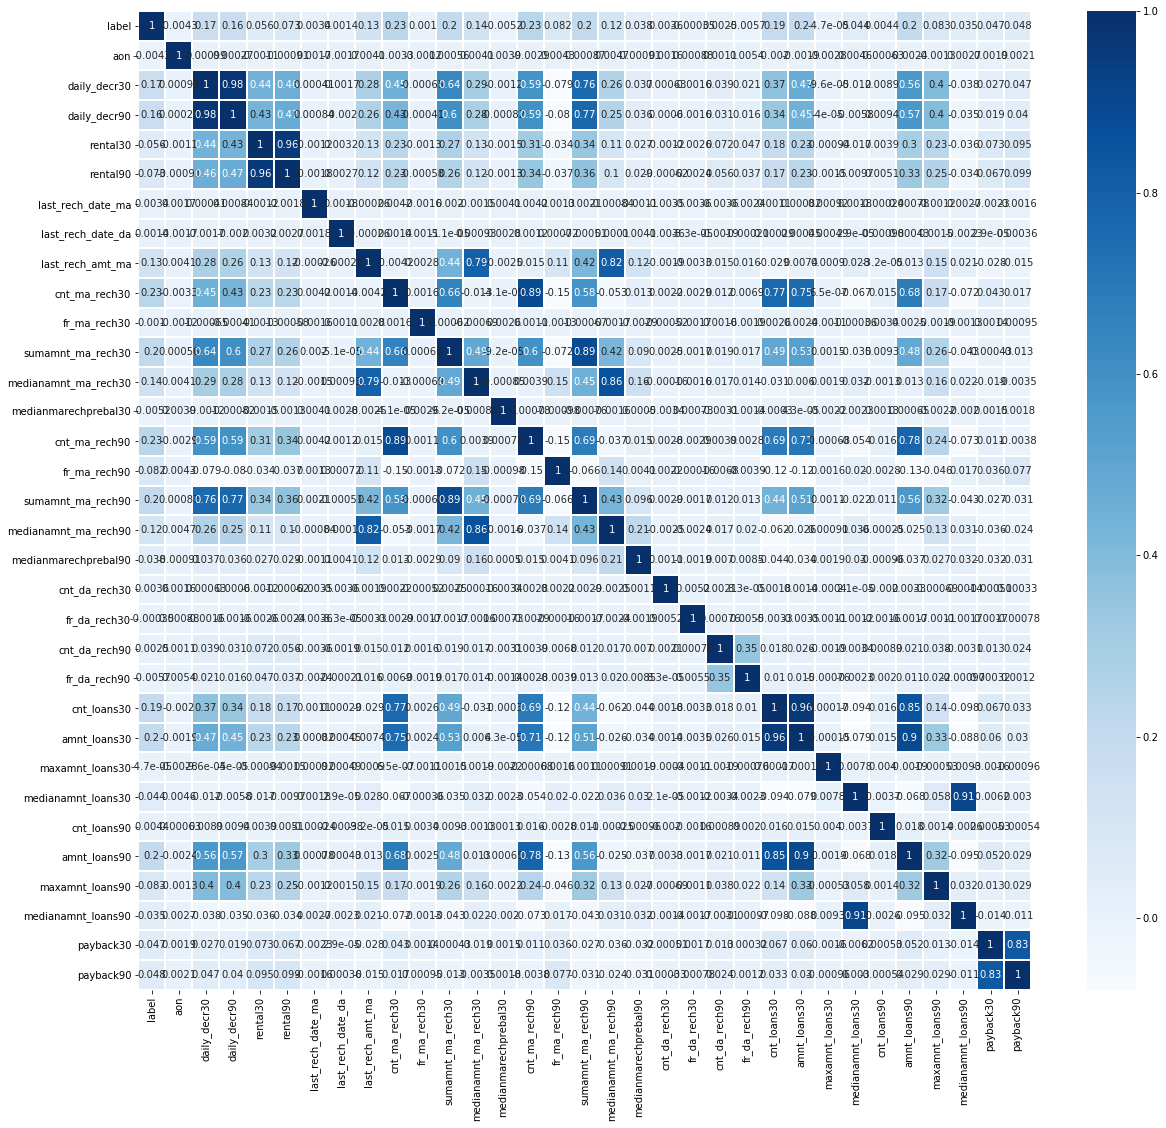

In [14]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True,cmap='Blues',linewidths=1,robust=True)
plt.show()

#### Checking Outliers

In [15]:
len(data.columns)

33

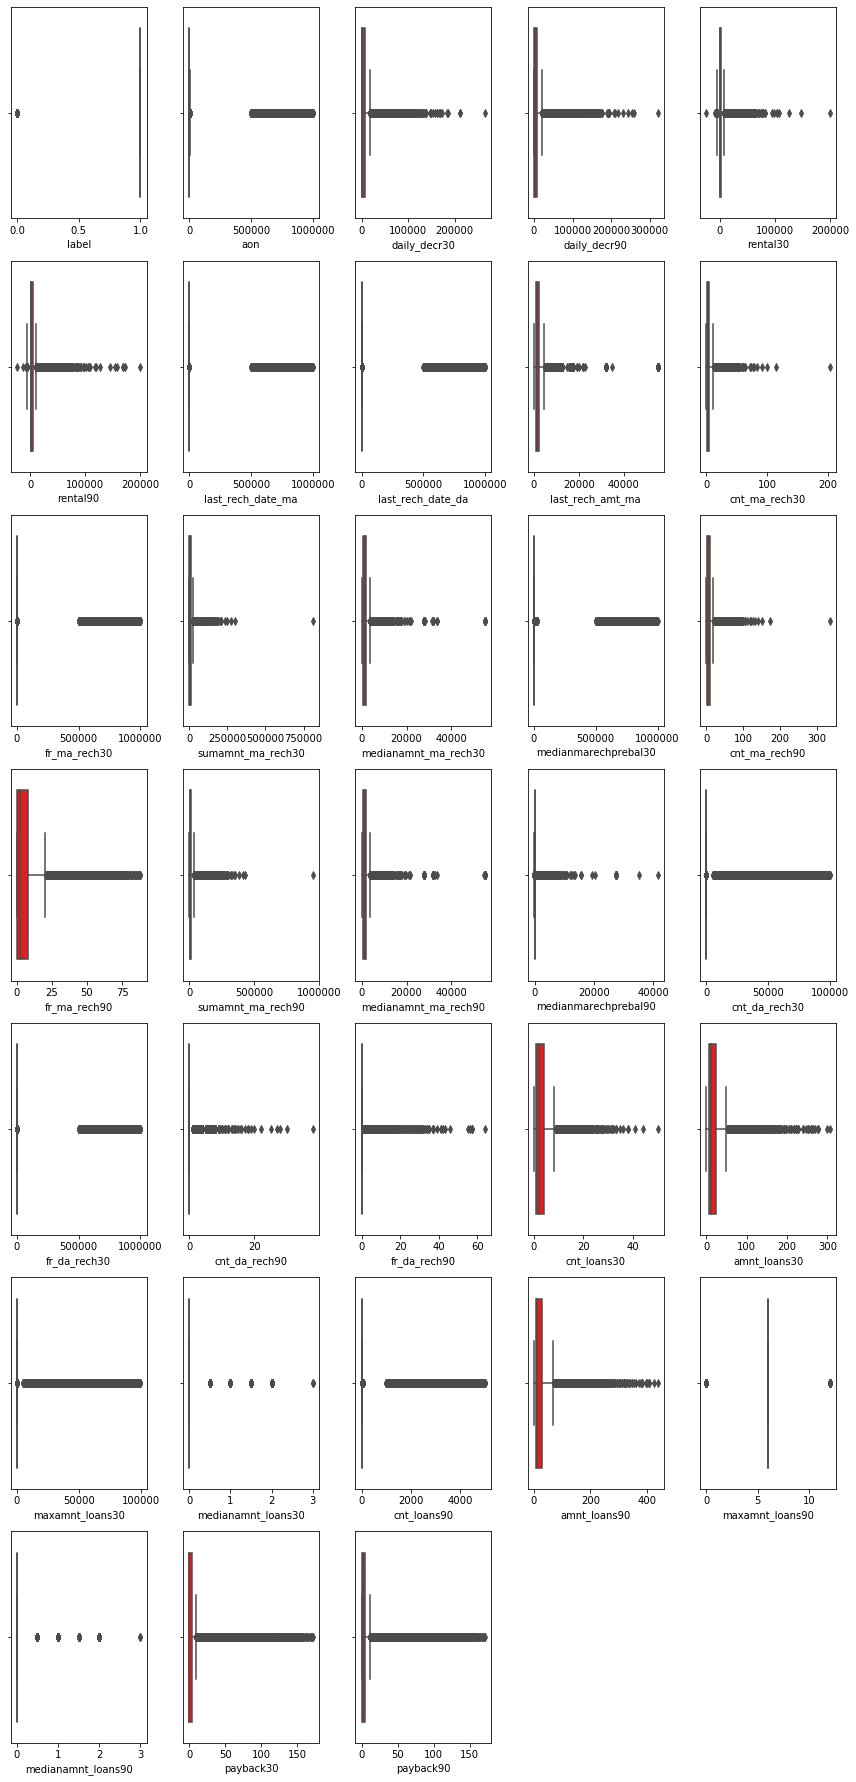

In [16]:
plt.figure(figsize=(12,35))

for i,col in zip(range(len(data.columns)),data.columns):
    plt.subplot(10,5,i+1)
    sns.boxplot(data[col],color='red',orient='v')
    plt.tight_layout()

In [17]:
from scipy.stats import zscore

In [18]:
zscr=np.abs(zscore(data))

In [19]:
out_row,out_col=np.where(zscr>3)

In [20]:
new_data=data[(zscr<3).all(axis=1)]

In [21]:
print(data.shape,'\t',new_data.shape)

(209207, 33) 	 (161093, 33)


In [22]:
Data=new_data

#### Checking Skewness of data

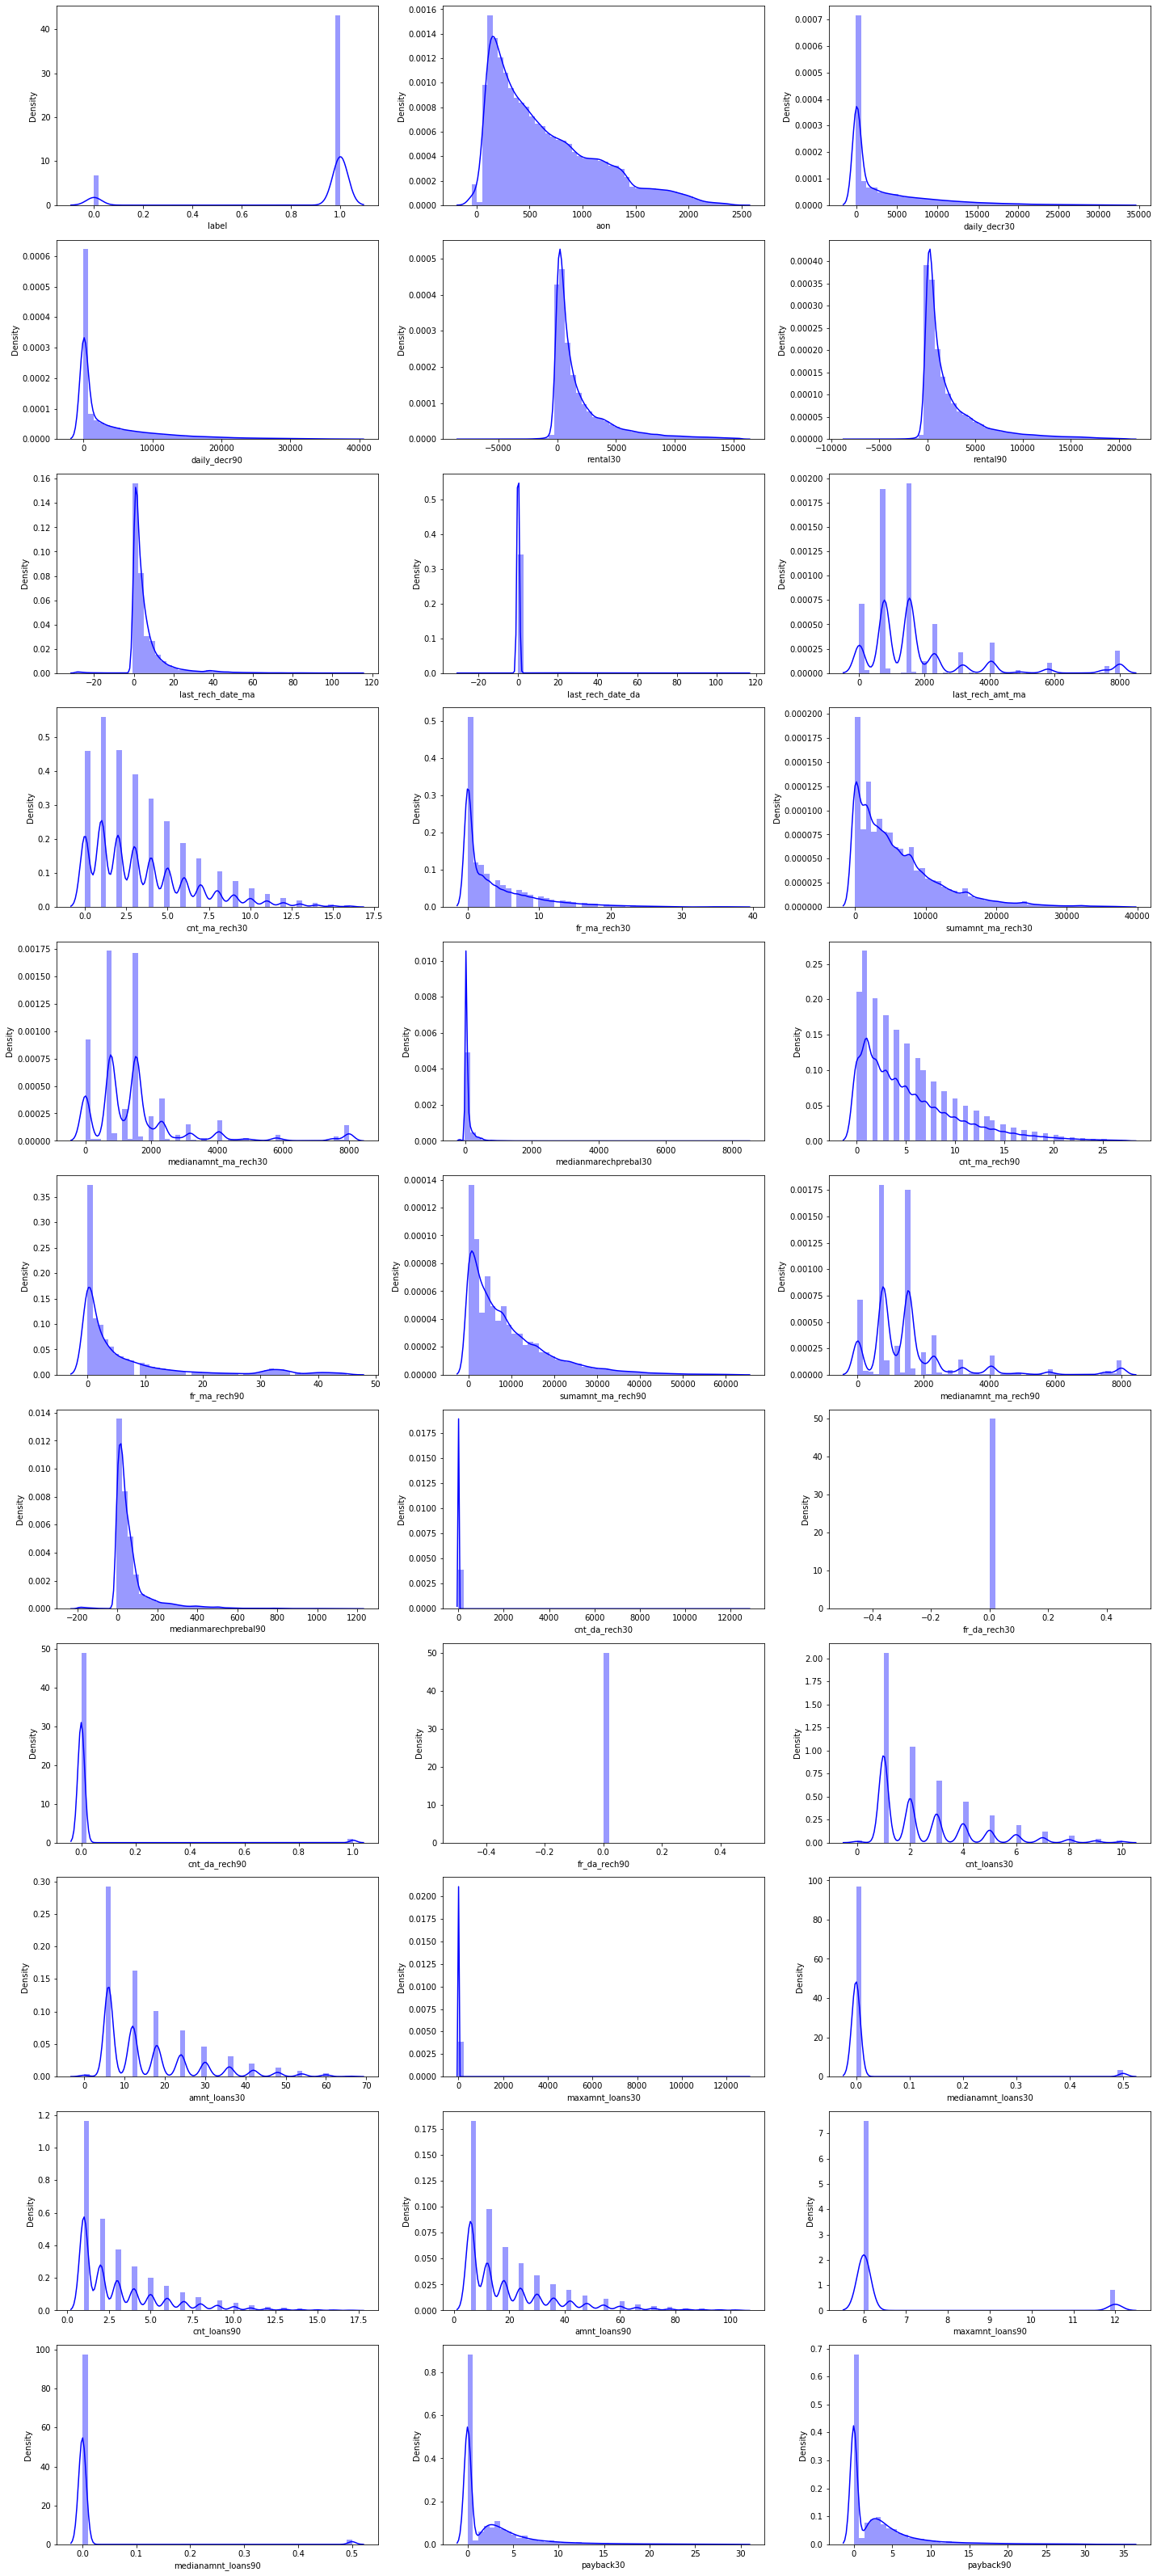

In [23]:
plt.figure(figsize=(20,60))

for i,col in zip(range(len(Data.columns)),Data.columns):
    plt.subplot(15,3,i+1)
    sns.distplot(Data[col],color='blue')
    plt.tight_layout()

In [24]:
for index in Data.skew().index:
    if Data.skew().loc[index]>0.5:
        Data[index]=np.cbrt(Data[index])
    if Data.skew().loc[index]<-0.5:
        Data[index]=np.cbrt(Data[index])

#### Checking unique values in each feaeture columns

In [25]:
for col in Data.columns:
    print(f'Unique values in column {col} = {len(Data[col].unique())}')

Unique values in column label = 2
Unique values in column aon = 2398
Unique values in column daily_decr30 = 114793
Unique values in column daily_decr90 = 120950
Unique values in column rental30 = 101514
Unique values in column rental90 = 107191
Unique values in column last_rech_date_ma = 131
Unique values in column last_rech_date_da = 123
Unique values in column last_rech_amt_ma = 47
Unique values in column cnt_ma_rech30 = 17
Unique values in column fr_ma_rech30 = 36
Unique values in column sumamnt_ma_rech30 = 9256
Unique values in column medianamnt_ma_rech30 = 378
Unique values in column medianmarechprebal30 = 23242
Unique values in column cnt_ma_rech90 = 28
Unique values in column fr_ma_rech90 = 46
Unique values in column sumamnt_ma_rech90 = 21310
Unique values in column medianamnt_ma_rech90 = 447
Unique values in column medianmarechprebal90 = 23226
Unique values in column cnt_da_rech30 = 73
Unique values in column fr_da_rech30 = 1
Unique values in column cnt_da_rech90 = 2
Unique val

In [26]:
Data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,0.0,1.864265,14.510179,14.526152,6.038000,6.383568,1.080060,0.0,2.260152,1.080060,2.758924,2.441099,2.260152,1.957434,1.080060,2.758924,14.546423,2.260152,1.957434,0.0,0.0,0.0,0,1.259921,2.289428,1.817121,0.0,1.259921,2.289428,1.817121,0.0,3.072317,3.072317
2,1.0,2.074637,22.971610,22.973347,15.454616,15.454616,1.394951,0.0,2.618487,1.000000,0.000000,2.618487,2.618487,3.937357,1.000000,0.000000,17.953584,2.618487,3.937357,0.0,0.0,0.0,0,1.000000,2.289428,2.289428,0.0,1.000000,2.289428,2.289428,0.0,0.000000,0.000000
3,1.0,2.009789,11.181560,11.181560,9.655359,9.655359,1.129831,0.0,2.260152,1.000000,0.000000,2.260152,2.260152,4.047761,1.000000,0.000000,11.545503,2.260152,4.047761,0.0,0.0,0.0,0,1.000000,1.817121,1.817121,0.0,1.000000,1.817121,1.817121,0.0,0.000000,0.000000
4,1.0,1.839368,2.768873,2.768873,5.422267,5.422267,1.510769,0.0,2.141438,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,2.141438,1.357209,0.0,0.0,0.0,0,1.259921,2.289428,1.817121,0.0,1.259921,2.289428,1.817121,0.0,0.000000,0.000000
5,1.0,2.141438,5.320595,5.320595,10.319359,10.319359,1.166529,0.0,2.364361,1.241366,1.259921,3.005814,2.364361,3.072317,1.259921,1.259921,28.641646,2.423878,3.271066,0.0,0.0,0.0,0,1.912931,3.476027,1.817121,0.0,1.912931,3.476027,1.817121,0.0,1.326352,1.326352


In [27]:
Data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.0,161093.000000,161093.0,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000,161093.000000
mean,0.863247,1.962454,10.835070,11.078143,9.929139,10.615535,1.019670,0.065608,2.007781,0.970139,1.047730,2.201186,1.921271,3.137217,1.044735,1.263694,17.638840,1.993171,3.209554,0.019004,0.0,0.019635,0.0,1.284640,2.373292,1.861239,0.025137,1.374593,2.532111,1.864113,0.019801,0.789886,0.896835
std,0.343588,0.358926,8.317354,8.648109,5.897286,6.443415,0.439106,0.466103,0.739161,0.412682,0.927086,0.945579,0.812506,2.211613,0.389407,1.082872,8.796358,0.730793,2.049577,0.452892,0.0,0.138742,0.0,0.318541,0.598135,0.433965,0.138996,0.379686,0.706275,0.141374,0.123792,0.879282,0.915684
min,0.000000,-1.537463,-3.469255,-3.469255,-19.820689,-19.820689,-1.453746,-3.072317,0.000000,0.000000,0.000000,0.000000,0.000000,-5.848035,0.000000,0.000000,0.000000,0.000000,-5.848035,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.817121,1.817121,0.000000,0.000000,0.000000
25%,1.000000,1.837665,3.220506,3.226857,6.180096,6.378574,1.000000,0.000000,2.092769,1.000000,0.000000,2.260152,2.092769,2.099924,1.000000,0.000000,12.437555,2.093221,2.357348,0.000000,0.0,0.000000,0.0,1.000000,1.817121,1.817121,0.000000,1.000000,1.817121,1.817121,0.000000,0.000000,0.000000
50%,1.000000,2.000000,9.654894,9.655966,9.630516,10.247237,1.129831,0.000000,2.260152,1.129831,1.259921,2.553590,2.260152,3.146103,1.166529,1.259921,18.426050,2.260152,3.236433,0.000000,0.0,0.000000,0.0,1.259921,2.289428,1.817121,0.000000,1.259921,2.289428,1.817121,0.000000,0.000000,1.144714
75%,1.000000,2.142441,17.801448,18.150427,13.747832,14.859443,1.241366,0.000000,2.316923,1.195813,1.817121,2.732120,2.261454,4.258001,1.259921,2.000000,23.689876,2.261454,4.217163,0.000000,0.0,0.000000,0.0,1.442250,2.884499,1.817121,0.000000,1.587401,3.107233,1.817121,0.000000,1.565040,1.650964
max,1.000000,2.378903,32.097360,33.871784,25.002469,27.506220,1.690907,4.862944,2.714418,1.360790,3.361975,3.228771,2.714418,20.386443,1.442250,3.556893,39.782570,2.714418,10.623633,23.391417,0.0,1.000000,0.0,2.154435,4.041240,23.504069,0.793701,2.571282,4.672329,2.289428,0.793701,3.101468,3.278836


#### Checking whether the dataset is balanced or not

In [28]:
Data.label.value_counts()

1.0    139063
0.0     22030
Name: label, dtype: int64

Hence the dataset is Unbalance we need to it as balanced dataset

In [29]:
nondefaulter=Data[Data.label==1]
defaulter=Data[Data.label==0]

In [30]:
from sklearn.utils import resample

In [31]:
default_sampled=resample(defaulter,n_samples=len(nondefaulter))

In [32]:
upsampled=pd.concat([nondefaulter,default_sampled])

In [33]:
upsampled.label.value_counts()

0.0    139063
1.0    139063
Name: label, dtype: int64

#### Splitting to input and output data

In [34]:
xdata=upsampled.drop(columns=['label'])
xdata.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
2,2.074637,22.971610,22.973347,15.454616,15.454616,1.394951,0.0,2.618487,1.000000,0.000000,2.618487,2.618487,3.937357,1.000000,0.000000,17.953584,2.618487,3.937357,0.0,0.0,0.0,0,1.000000,2.289428,2.289428,0.0,1.000000,2.289428,2.289428,0.0,0.000000,0.000000
3,2.009789,11.181560,11.181560,9.655359,9.655359,1.129831,0.0,2.260152,1.000000,0.000000,2.260152,2.260152,4.047761,1.000000,0.000000,11.545503,2.260152,4.047761,0.0,0.0,0.0,0,1.000000,1.817121,1.817121,0.0,1.000000,1.817121,1.817121,0.0,0.000000,0.000000
4,1.839368,2.768873,2.768873,5.422267,5.422267,1.510769,0.0,2.141438,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,2.141438,1.357209,0.0,0.0,0.0,0,1.259921,2.289428,1.817121,0.0,1.259921,2.289428,1.817121,0.0,0.000000,0.000000
5,2.141438,5.320595,5.320595,10.319359,10.319359,1.166529,0.0,2.364361,1.241366,1.259921,3.005814,2.364361,3.072317,1.259921,1.259921,28.641646,2.423878,3.271066,0.0,0.0,0.0,0,1.912931,3.476027,1.817121,0.0,1.912931,3.476027,1.817121,0.0,1.326352,1.326352
6,2.023199,13.117984,13.125916,7.166939,7.243982,1.080060,0.0,2.260152,1.166529,2.154435,2.636533,2.260152,2.487942,1.259921,0.000000,22.730309,2.260152,3.823584,0.0,0.0,0.0,0,1.442250,2.620741,1.817121,0.0,1.442250,2.620741,1.817121,0.0,2.223980,2.027401


In [35]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [36]:
xdata=pd.DataFrame(columns=xdata.columns,
                   data=std.fit_transform(xdata))

In [37]:
xdata.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.347194,1.804980,1.733539,1.001500,0.847635,0.880349,-0.126403,0.911920,0.377572,-0.841925,0.690660,0.978478,0.620739,0.223844,-0.887914,0.409088,0.928796,0.586673,-0.038375,0.0,-0.127675,0.0,-0.696713,0.149958,1.118982,-0.157856,-0.750842,-0.038818,3.592824,-0.14323,-0.664450,-0.715861
1,0.194688,0.307773,0.280424,0.048282,-0.038400,0.385125,-0.126403,0.534839,0.377572,-0.841925,0.377424,0.623366,0.668903,0.223844,-0.887914,-0.266781,0.548629,0.637144,-0.038375,0.0,-0.127675,0.0,-0.696713,-0.720210,-0.087688,-0.157856,-0.750842,-0.767329,-0.278333,-0.14323,-0.664450,-0.715861
2,-0.206097,-0.760547,-0.756282,-0.647506,-0.685149,1.096689,-0.126403,0.409915,-1.609592,-0.841925,-1.598271,-1.616457,-1.096960,0.223844,-0.887914,-0.448760,0.422683,-0.592865,-0.038375,0.0,-0.127675,0.0,0.209822,0.149958,-0.087688,-0.157856,-0.000540,-0.038818,-0.278333,-0.14323,-0.664450,-0.715861
3,0.504291,-0.436506,-0.441830,0.157423,0.063049,0.453674,-0.126403,0.644500,0.857206,0.513010,1.029239,0.726638,0.243359,0.757447,0.251639,1.536373,0.722331,0.282072,-0.038375,0.0,-0.127675,0.0,2.487348,2.336118,-0.087688,-0.157856,1.884473,1.791452,-0.278333,-0.14323,0.908057,0.759428
4,0.226226,0.553677,0.520029,-0.360736,-0.406820,0.292156,-0.126403,0.534839,0.708493,1.474980,0.706435,0.623366,-0.011579,0.757447,-0.887914,0.912896,0.548629,0.534660,-0.038375,0.0,-0.127675,0.0,0.845736,0.760361,-0.087688,-0.157856,0.525779,0.472217,-0.278333,-0.14323,1.972273,1.539198


In [38]:
ydata=upsampled.label
ydata.head()

2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
Name: label, dtype: float64

#### Finding best random_state value for train_test_split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
# maxacc=0
# maxrs=0
# for rs in range(1,50):
#     xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=rs,stratify=ydata)
#     rmodel=RandomForestClassifier()
#     rmodel.fit(xtrain,ytrain)
#     ypred=rmodel.predict(xtest)
#     acc=accuracy_score(ytest,ypred)
    
#     if acc>maxacc:
#         maxacc=acc
#         maxrs=rs
        
# print(f'Maximum accuracy= {maxacc} at random_state= {maxrs}')

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=32,stratify=ydata)

In [42]:
# importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#importing boosting models

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# importing error metrics

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

#### Checking metrics evaluation on different model

In [43]:
models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]
ypreds=[]
for model in models:
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    ypreds.append(pred)
    print(f"Metrics evaluation of model {model} :")
    print(f'Accuracy score :\n {accuracy_score(ytest,pred)}\n')
    print(f'Confusion matrix :\n {confusion_matrix(ytest,pred)}\n')
    print(f'Classification report :\n{classification_report(ytest,pred)}\n')
    print('_________________________________________________________\n')

Metrics evaluation of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy score :
 0.7734245787291162

Confusion matrix :
 [[32834  8885]
 [10020 31699]]

Classification report :
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     41719
         1.0       0.78      0.76      0.77     41719

    accuracy                           0.77     83438
   macro avg       0.77      0.77      0.77     83438
weighted avg       0.77      0.77      0.77     83438


_________________________________________________________

Metrics evaluation of model GaussianNB(priors=None, var_smoothing=1e-09) :
Accuracy score :
 0.7475011385699561

Confusion matrix :
 [[30960 10

#### Cross validation score of different models

In [44]:
models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for model in models:
    score=cross_val_score(model,xdata,ydata,cv=5,scoring='accuracy')
    print(f'Model : {model}')
    print(f'Score : {score}')
    print(f'Mean score : {score.mean()}')
    print(f'Standard deivation : {score.std()}\n')
    print('_________________________________________________________\n')

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score : [0.77167152 0.77348315 0.77404045 0.77303371 0.77427416]
Mean score : 0.7733005962372296
Standard deivation : 0.0009223497677887778

_________________________________________________________

Model : GaussianNB(priors=None, var_smoothing=1e-09)
Score : [0.74819329 0.74565393 0.74754157 0.74971685 0.74684045]
Mean score : 0.7475892199791787
Standard deivation : 0.0013564654644346978

_________________________________________________________

Model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, m

- RandomForestClassifier,  BaggingClassifier and ExtraTreesClassifier has more accuracy on both cross_val_score and accuracy_score

- For further analysis these models are evaluated under GridSearchCV() for finding best parameters

#### GridSearchCV to find best parameters in GradientBoostingClassifier

In [45]:
grd=GridSearchCV(GradientBoostingClassifier(),
                 {'criterion':['friedman_mse','mse','mae'],'n_estimators':[100,200,300]})

grd.fit(xtrain,ytrain)
grd.best_params_

In [46]:
grd=GridSearchCV(RandomForestClassifier(),
                 {'criterion':['gini','entropy'],'n_estimators':range(80,100)})

grd.fit(xtrain,ytrain)
grd.best_params_

In [ ]:
grd=GridSearchCV(ExtraTreesClassifier(),
                 {'criterion':['gini','entropy'],'n_estimators':range(80,100)})

grd.fit(xtrain,ytrain)
grd.best_params_